In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/fakenews.csv
/kaggle/input/fake-news/FakeNewsNet.csv


****IMPORT DATA AND CHEKING FOR CLEANING DATA****

In [1]:
import pandas as pd

In [2]:
df_news = pd.read_csv('./datasets/FakeNewsNet.csv')

In [3]:
df_news.head(10)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
5,Gwen Stefani Got Dumped by Blake Shelton Over ...,www.intouchweekly.com/posts/gwen-stefani-dumpe...,www.intouchweekly.com,45,0
6,Broward County Sheriff Fired For Lying About P...,https://yournewswire.com/broward-county-sherif...,yournewswire.com,124,0
7,Amber Rose Shuts Down French Montana Dating Ru...,www.etonline.com/news/214798_amber_rose_shuts_...,www.etonline.com,4,0
8,Mindy Kaling makes first post-baby appearance ...,https://www.aol.com/article/entertainment/2018...,www.aol.com,59,1
9,Katharine McPhee Butchers Tony Nominations: “I...,https://www.98online.com/2018/05/02/katharine-...,www.98online.com,10,1


In [4]:
df_news.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [5]:
df_news.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [6]:
clean_news = df_news.dropna()
df_news.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [7]:
df = df_news.sample(frac=1)

In [8]:
df = df.drop(['news_url', 'tweet_num', 'source_domain'], axis=1)

In [9]:
df

,title,real
4545,"Jimmy Kimmel, Gal Gadot, Lupita Nyong’o Crash ...",1
930,Alexa Ray Joel slams online troll who called h...,1
19465,Nick Jonas took a $2.75 subway ride to the fan...,1
18929,Anna Faris’ Dad Reveals Truth Behind Shocking ...,0
676,"John Lewis, celebs react as ABC cancels ‘Rosea...",0
...,...,...
8603,Kelly Rowland Wants a Second Boob Job Because ...,1
19130,What Demi Lovato has said about sobriety and m...,1
16040,Kelly Ripa Says Lola Consuelos Freaked Over a ...,1
7126,Popular baby names,1


In [10]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [11]:
df.shape

(23196, 2)

In [12]:
print(df['real'].value_counts())

real
1    17441
0     5755
Name: count, dtype: int64


In [14]:
df['title'] = df['title'].str.lower().str.replace('[^\w\s]', '')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Rafli\AppData\Local\Temp\ipykernel_14680\1093656973.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['title'] = df['title'].str.lower().str.replace('[^\w\s]', '')


**TRAINING AND MODEL DATA**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [16]:
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

import re
import string

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 262.6 kB/s eta 0:00:01
     -------------------------------------  41.0/41.5 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 284.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 960.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 1.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.7 MB/s eta 0:00:01
   -------------

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rafli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\[-.*?\]', '', text)
    text = re.sub(r'\|\|', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['title'] = df['title'].apply(preprocess)

In [18]:
X = df['title']
y = df['real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**USE TfidfVectorizer FOR GET ACCURACY**

In [19]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.63%


**USE LogisticRegression FOR GET ACCURACY**

In [21]:
LR = LogisticRegression()
LR.fit(X_train_tfidf, y_train)

LogisticRegression()

In [22]:
pred_lr = LR.predict(X_test_tfidf)

In [23]:
LR.score(X_test_tfidf, y_test)

0.8452586206896552

**Visualization of prediction results to understand and model misclassification.**

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

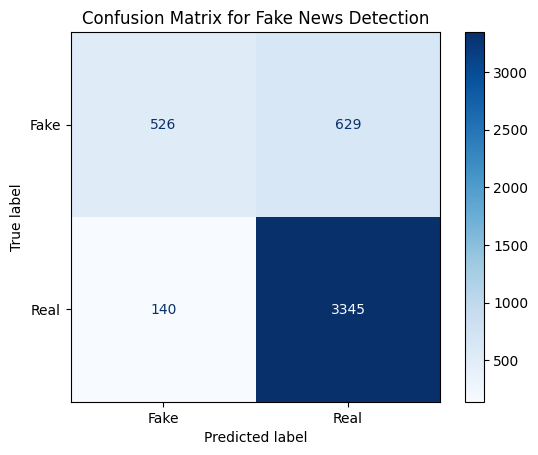

In [127]:
cm = confusion_matrix(y_test, pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Fake News Detection")
plt.show()
